In [1]:
# Documentação da API do Spotify: https://developer.spotify.com/documentation/web-api/
# Documentação de referências do Spotify: https://developer.spotify.com/documentation/web-api/reference/object-model/

import json
import spotipy
import spotipy.util as util
import pandas

# Carrega as credenciais da API do Spotify
# Nesse caso, as credenciais estão em um JSON salvo no mesmo diretório, que vai ser puxado pelo código
with open('credenciais_spotify.json') as cred_data:
    info = json.load(cred_data)
    username = info['username']
    client_id = info['client_id']
    client_secret = info['client_secret']
    redirect_uri = info['redirect_uri']
    scope = info['scope']

# Autorização e inicialização da spotipy
token = util.prompt_for_user_token(username = username, 
                                   scope = scope, 
                                   client_id = client_id, 
                                   client_secret = client_secret, 
                                   redirect_uri = redirect_uri)
sp = spotipy.Spotify(auth=token)


musicas_oscar = ["2VxeLyX666F8uXCJ0dZF8B", "3GCdLUSnKSMJhs4Tj6CV3s", "7ELxtyrasiOfwsRUJiEMGR", "1Ea0zWC9cjfsF70fvZ3qva", "4DCwzgT5zXXLJY1o5fXfxR"]
planilha = []

for musica in musicas_oscar:
    
    sopa_musica = sp.track(musica)
    nome_musica = sopa_musica["name"]
    
    sopa_artista = sopa_musica["album"]
    dados_artista = sopa_musica["artists"]
    dict_artista = dados_artista[0]
    nome_artista = dict_artista["name"]
    
    sopa_features = sp.audio_features(musica)
    dic_features = sopa_features[0]
    dancabilidade = dic_features["danceability"]
    energia = dic_features["energy"]
    sonoridade = dic_features["loudness"]
    canto = dic_features["speechiness"]
    acustica = dic_features["acousticness"]
    instrumentalidade = dic_features["instrumentalness"]
    vivacidade = dic_features["liveness"]
    valencia = dic_features["valence"]
    tempo = dic_features["tempo"]

    print(f"Música: {nome_musica}")
    print(f"Artista: {nome_artista}")
    print(f"Dançabilidade: {dancabilidade}")
    print(f"Energia: {energia}")
    print(f"Sonoridade: {sonoridade}")
    print(f"Fonação: {canto}")
    print(f"Acústica: {acustica}")
    print(f"Instrumentalidade: {instrumentalidade}")
    print(f"Vivacidade: {vivacidade}")
    print(f"Valência: {valencia}")
    print(f"Tempo: {tempo}")
    print()
    
    dicionario = {"Música": nome_musica, "Artista": nome_artista, "Dançabilidade": dancabilidade,
                 "Energia": energia, "Sonoridade": sonoridade, "Fonação": canto, "Acústica": acustica,
                 "Instrumentalidade": instrumentalidade, "Vivacidade": vivacidade, "Valência": valencia,
                 "Tempo": tempo}
    planilha.append(dicionario)
    
df = pandas.DataFrame(planilha)
df.sort_values(by = "Artista", ascending = True)

# Linha gera arquivo CSV com base no dataframe do pandas
# df.to_csv("musicas_oscar.csv", sep = ";", encoding = "utf-8")

Música: Shallow
Artista: Lady Gaga
Dançabilidade: 0.572
Energia: 0.385
Sonoridade: -6.362
Fonação: 0.0308
Acústica: 0.371
Instrumentalidade: 0
Vivacidade: 0.231
Valência: 0.323
Tempo: 95.799

Música: All The Stars (with SZA)
Artista: Kendrick Lamar
Dançabilidade: 0.698
Energia: 0.633
Sonoridade: -4.946
Fonação: 0.0597
Acústica: 0.0605
Instrumentalidade: 0.000194
Vivacidade: 0.0926
Valência: 0.552
Tempo: 96.924

Música: I'll Fight
Artista: Jennifer Hudson
Dançabilidade: 0.467
Energia: 0.665
Sonoridade: -3.387
Fonação: 0.0332
Acústica: 0.0246
Instrumentalidade: 1.01e-05
Vivacidade: 0.089
Valência: 0.0882
Tempo: 81.972

Música: The Place Where Lost Things Go - From "Mary Poppins Returns"
Artista: Emily Blunt
Dançabilidade: 0.353
Energia: 0.0674
Sonoridade: -19.18
Fonação: 0.0454
Acústica: 0.961
Instrumentalidade: 1.4e-05
Vivacidade: 0.0946
Valência: 0.198
Tempo: 123.331

Música: When a Cowboy Trades His Spurs for Wings
Artista: Willie Watson
Dançabilidade: 0.571
Energia: 0.226
Sonoridade:

,Acústica,Artista,Dançabilidade,Energia,Fonação,Instrumentalidade,Música,Sonoridade,Tempo,Valência,Vivacidade
3,0.9610,Emily Blunt,0.353,0.0674,0.0454,0.000014,"The Place Where Lost Things Go - From ""Mary Po...",-19.180,123.331,0.1980,0.0946
2,0.0246,Jennifer Hudson,0.467,0.6650,0.0332,0.000010,I'll Fight,-3.387,81.972,0.0882,0.0890
1,0.0605,Kendrick Lamar,0.698,0.6330,0.0597,0.000194,All The Stars (with SZA),-4.946,96.924,0.5520,0.0926
0,0.3710,Lady Gaga,0.572,0.3850,0.0308,0.000000,Shallow,-6.362,95.799,0.3230,0.2310
4,0.8190,Willie Watson,0.571,0.2260,0.0363,0.000000,When a Cowboy Trades His Spurs for Wings,-12.637,135.126,0.4800,0.1210


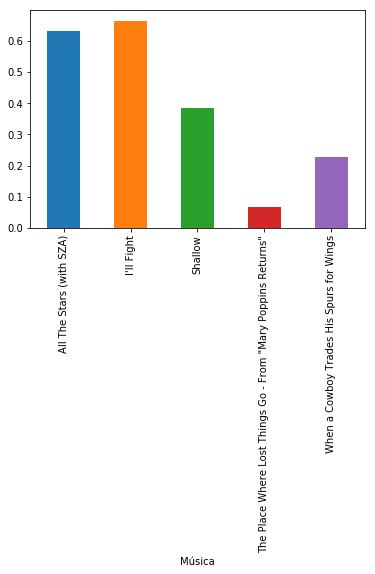

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

grafico = df.groupby("Música")["Energia"].mean()
grafico.plot.bar()

# Não precisa usar o comando get_figure() pra não imprimir o gráfico duas vezes
# agrupamento.plot.bar().get_figure()